In [0]:
import pandas as pd

In [0]:
tr = pd.read_excel("./data/project/train.xlsx")
test = pd.read_excel("./data/project/test.xlsx")

In [0]:
print(tr.columns)
print(test.columns)
tr

Index(['year', 'actual', 'vehicle', 'charging station', 'article',
       'global-EV'],
      dtype='object')
Index(['year', 'actual', 'vehicle'], dtype='object')


,year,actual,vehicle,charging station,article,global-EV
0,1,2011,338,33,11888,50000
1,2,2012,753,118,8840,125760
2,3,2013,780,177,14588,212986
3,4,2014,1075,237,22462,315519
4,5,2015,2907,337,32971,565668
5,6,2016,5914,491,50272,773600
6,7,2017,13826,933,68660,1225000
7,8,2018,31696,1699,110078,2018247


In [0]:
sel = ['actual']
X = tr[sel]
y = tr['vehicle']
# print(X[5:])

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [0]:
model = PolynomialFeatures(degree=2)
x_poly = model.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)
lin_reg_2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
import matplotlib.pyplot as plt

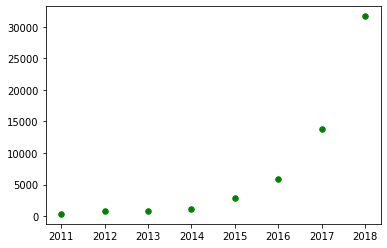

In [0]:
plt.scatter(X, y, color='green', s=30)

Text(0, 0.5, 'Vehicle Sales')

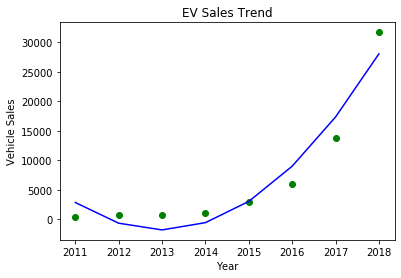

In [0]:
pred = lin_reg_2.predict(x_poly)
plt.scatter(X, y, color='green')
plt.plot(X, pred, color= 'blue')
plt.title('EV Sales Trend')
plt.xlabel('Year')
plt.ylabel('Vehicle Sales')

In [0]:
import numpy as np

In [0]:
year_dat = np.arange(2019, 2035)
print(year_dat)
newdata = pd.DataFrame( {'year':year_dat} )
# newdata = pd.DataFrame( {'year':[9, 10, 11,12,13,14,15,16, 17, 18, 19, 20]} )
x_poly_new = model.fit_transform(newdata)
newdata

[2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032
 2033 2034]


,year
0,2019
1,2020
2,2021
3,2022
4,2023
5,2024
6,2025
7,2026
8,2027
9,2028


In [0]:
pred_new = lin_reg_2.predict(x_poly_new)
pred_new

array([ 41097.5535574 ,  56528.86307621,  74327.13687992,  94492.37496853,
       117024.57734299, 141923.74400139, 169189.87494469, 198822.97017384,
       230823.02968597, 265190.05348396, 301924.0415678 , 341024.99393654,
       382492.91059017, 426327.79152966, 472529.63675308, 521098.44626141])

Text(0, 0.5, 'Vehicle')

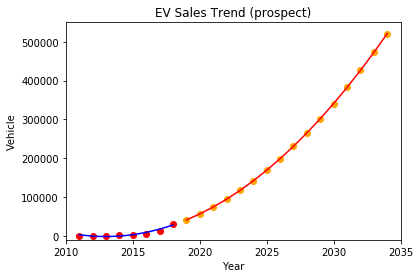

In [0]:
plt.scatter(X, y, color='red')
plt.scatter(newdata, pred_new, color='orange')  # 예측

plt.plot(X, pred, color= 'blue')
plt.plot(newdata, pred_new, color= 'red')         # 예측

plt.xlim(2010, 2035)
plt.ylim(-10000, 550000)
plt.title('EV Sales Trend (prospect)')
plt.xlabel('Year')
plt.ylabel('Vehicle')


In [0]:
sub = pd.read_excel("./data/project/sub.xlsx")

In [0]:
sub['vehicle'] = pred_new

In [0]:
sub.to_excel("trial_last_0917.xlsx", index=False)